In [1]:
# STEP 1 Load Data from PostgreSQL

In [2]:
# Import required libraries for database connection and data handling

import psycopg2
import pandas as pd
from sqlalchemy import create_engine

In [3]:
# Define PostgreSQL connection details

host = 'localhost'
database = 'PWC Customer Churn'
user = 'postgres'
password = 'admin123'
port = '5432'

In [4]:
# Connect to PostgreSQL

conn = psycopg2.connect(
    host = host,
    database = database,
    user = user,
    password = password,
    port = port
)

In [5]:
# Create a SQLALchemy engine for easier queries

engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')

In [6]:
# Load the customer churn data into a Pandas DataFrame

df = pd.read_sql('SELECT * FROM customer_churn;', engine)
df.head(10)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,numadmintickets,numtechtickets,churn
0,3668-QPYBK,Male,0,No,No,2,Phone Service,No,Internet Service - DSL,Online Security,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
1,7795-CFOCW,Male,0,No,No,45,No,No phone service,Internet Service - DSL,Online Security,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
2,9237-HQITU,Female,0,No,No,2,Phone Service,No,Internet Service - Fiber Optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
3,9305-CDSKC,Female,0,No,No,8,Phone Service,Multiple Lines,Internet Service - Fiber Optic,No,...,Streaming TV,Streaming Movies,Month-to-month,Yes,Electronic check,99.65,820.50,0,0,Yes
4,1452-KIOVK,Male,0,No,Yes,22,Phone Service,Multiple Lines,Internet Service - Fiber Optic,No,...,Streaming TV,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,0,No
5,6713-OKOMC,Female,0,No,No,10,No,No phone service,Internet Service - DSL,Online Security,...,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,0,No
6,7892-POOKP,Female,0,Yes,No,28,Phone Service,Multiple Lines,Internet Service - Fiber Optic,No,...,Streaming TV,Streaming Movies,Month-to-month,Yes,Electronic check,104.80,3046.05,0,2,Yes
7,6388-TABGU,Male,0,No,Yes,62,Phone Service,No,Internet Service - DSL,Online Security,...,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,0,No
8,9763-GRSKD,Male,0,Yes,Yes,13,Phone Service,No,Internet Service - DSL,Online Security,...,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,1,0,No
9,7469-LKBCI,Male,0,No,No,16,Phone Service,No,No,No internet service,...,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,0,0,No


In [7]:
# STEP 2 Data Preprocessing

In [8]:
# Import LabelEncoder for encoding categorical variables 

from sklearn.preprocessing import LabelEncoder

In [9]:
# Convert 'contract' columns into dummy variables (One-hot encoding)

df = pd.get_dummies(df, columns=['contract'], drop_first=False)

In [10]:
# Drop 'contract_Month-to-month' to avoid dummy variable trap

df.drop(columns=['contract_Month-to-month'], inplace=True)

In [11]:
# Convert 'churn' columns to binary (Yes = 1, No = 0)

df['churn'] = df['churn'].map({'Yes':1, 'No':0})

In [12]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,numadmintickets,numtechtickets,churn,contract_One year,contract_Two year
0,3668-QPYBK,Male,0,No,No,2,Phone Service,No,Internet Service - DSL,Online Security,...,No,Yes,Mailed check,53.85,108.15,0,0,1,False,False
1,7795-CFOCW,Male,0,No,No,45,No,No phone service,Internet Service - DSL,Online Security,...,No,No,Bank transfer (automatic),42.30,1840.75,0,3,0,True,False
2,9237-HQITU,Female,0,No,No,2,Phone Service,No,Internet Service - Fiber Optic,No,...,No,Yes,Electronic check,70.70,151.65,0,0,1,False,False
3,9305-CDSKC,Female,0,No,No,8,Phone Service,Multiple Lines,Internet Service - Fiber Optic,No,...,Streaming Movies,Yes,Electronic check,99.65,820.50,0,0,1,False,False
4,1452-KIOVK,Male,0,No,Yes,22,Phone Service,Multiple Lines,Internet Service - Fiber Optic,No,...,No,Yes,Credit card (automatic),89.10,1949.40,0,0,0,False,False


In [13]:
# STEP 3 Define X (Features) & Y (Target)

In [14]:
# Define feature variables (X) and target variable (y)

X = df[['contract_One year', 'contract_Two year', 'tenure', 'monthlycharges', 'numtechtickets']]
y = df['churn']

In [15]:
# STEP 4 Train-Test Split

In [16]:
# Import train_test_split for dataset splitting

from sklearn.model_selection import train_test_split

In [18]:
# Split dataset (80% trainin, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training samples: {len(X_train)}, Testing samples: {len(X_test)}')

Training samples: 5634, Testing samples: 1409


In [19]:
# STEP 5 Train Logistic Regression

In [20]:
# Import LogisticRegression for classification

from sklearn.linear_model import LogisticRegression

In [21]:
# Initialize Logstic Regression model with balanced class weight

model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)

In [22]:
# Train the model

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

In [23]:
# STEP 6 Evaluate Model Performance

In [24]:
# Import metrics for model evaluation

from sklearn.metrics import accuracy_score, classification_report

In [25]:
# Predict on test data

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1] # Get churn probabilities

In [26]:
# Print classification reports

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7750177430801988
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      1057
           1       0.53      0.91      0.67       352

    accuracy                           0.78      1409
   macro avg       0.74      0.82      0.75      1409
weighted avg       0.85      0.78      0.79      1409



In [27]:
# STEP 7 Assign Churn Risk Scores to Customers

In [28]:
# Calculate churn risk scores (%) for all customers (active and churned)

df['Churn_Risk_scores'] = model.predict_proba(X)[:, 1] * 100

In [29]:
# Filter only customer (churn = 0)

active_customers = df[df['churn'] == 0].copy()

In [30]:
# Predict churn risk for active customers 

active_customers['Churn_Risk_Scores'] = model.predict_proba(active_customers[X.columns])[:, 1] * 100

In [31]:
# Show top 50 active customers with highest churn risk

active_customers[['customerid', 'Churn_Risk_Scores']].sort_values(by='Churn_Risk_Scores', ascending=False).head(50)

,customerid,Churn_Risk_Scores
4333,2674-MLXMN,98.935674
4762,4001-TSBTV,98.297732
1165,5334-JLAXU,98.129505
2048,2038-LLMLM,97.786471
4687,2988-GBIVW,95.852682
1773,3144-KMTWZ,95.755918
5151,5439-WIKXB,94.460117
4839,9058-MJLZC,94.446239
5003,2067-QYTCF,93.947233
2954,7587-AOVVU,93.929048


In [32]:
# STEP 8 Churn Risk Scores on Chart

In [33]:
# Import Matplotlib for data visualization  

import matplotlib.pyplot as plt

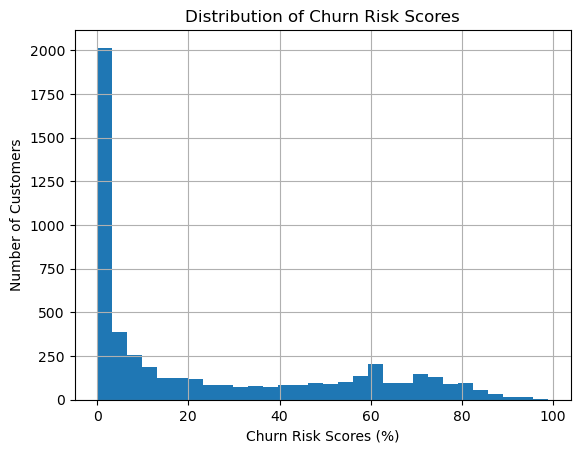

In [34]:
# Distribution of churn risk customers on histogram chart

active_customers['Churn_Risk_Scores'].hist(bins=30)
plt.xlabel('Churn Risk Scores (%)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Churn Risk Scores')
plt.show()

In [35]:
# Zoom in for high-risk customers

potential_churners = active_customers[active_customers['Churn_Risk_Scores'] > 50]

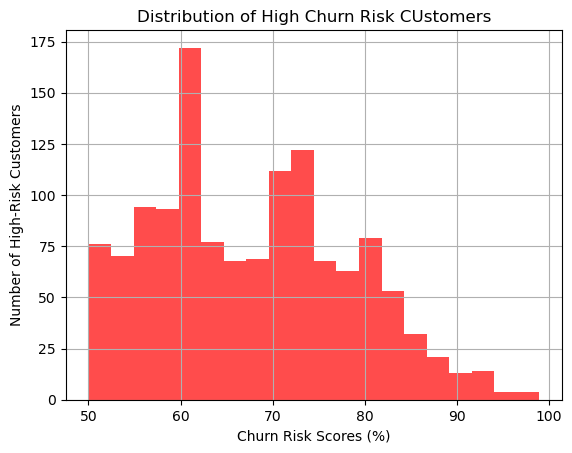

In [36]:
# Distribution of high-risk customers on histogram chart

potential_churners['Churn_Risk_Scores'].hist(bins=20, color='red', alpha=0.7)
plt.xlabel('Churn Risk Scores (%)')
plt.ylabel('Number of High-Risk Customers')
plt.title('Distribution of High Churn Risk CUstomers')
plt.show()

In [37]:
# STEP 9 Churn Risk Estimation

In [38]:
# Count active customers

total_active_customers = len(active_customers)
print(f"Total Active Customers: {total_active_customers}")

Total Active Customers: 5174


In [39]:
# Identify high-risk customers (churn risk score > 50%)

num_potential_churners = len(potential_churners)
print(f"Potential Churners: {num_potential_churners}")

Potential Churners: 1304


In [40]:
# Calculate the percentage of high-hisk customers

churn_risk_percentage = (num_potential_churners / total_active_customers) * 100
print(f"Churn Risk Percentage: {churn_risk_percentage:.2f}%")

Churn Risk Percentage: 25.20%


In [41]:
# Final Summary Statement

print(f"I've uncovered {churn_risk_percentage:.2f}% of active customers who are at risk of churning, "
      f"out of {total_active_customers} active customers.")

I've uncovered 25.20% of active customers who are at risk of churning, out of 5174 active customers.
